# Thompson Sampling

## Importing the libraries

In [328]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random

## Importing the dataset

In [329]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [330]:
N = len(dataset)
d = len(dataset.values[0])
number_of_rewards_1 = [0] * d
number_of_rewards_0 = [0] * d
ads_selected = []
total_reward = 0
for n in range(N):
    ad = 0
    max_random = 0
    for i in range(d):
        random_draw = random.betavariate(number_of_rewards_1[i] + 1, number_of_rewards_0[i] + 1)
        if random_draw > max_random:
            max_random = random_draw
            ad = i
    reward = dataset.values[n, ad]
    total_reward += reward
    if reward == 1:
        number_of_rewards_1[ad] += 1
    else:
        number_of_rewards_0[ad] += 1
    ads_selected.append(ad)

## Visualising the results - Histogram

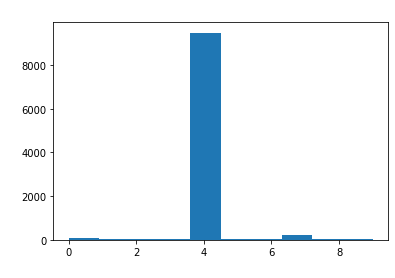

In [331]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections', c='white')
plt.xlabel('Ads', c='white')
plt.ylabel('Number of times each ad was selected', c='white')
plt.show()
